6497
5197
1300


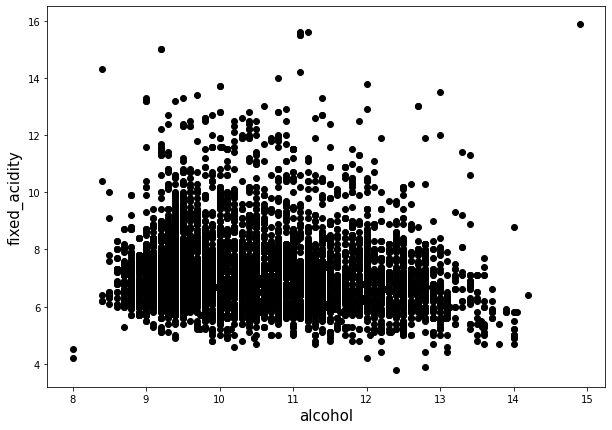

(1300,)
[[980  79]
 [119 122]]
0.8476923076923077
0.5520361990950226
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1059
           1       0.61      0.51      0.55       241

    accuracy                           0.85      1300
   macro avg       0.75      0.72      0.73      1300
weighted avg       0.84      0.85      0.84      1300



In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

dataset=pd.read_csv('../input/wine-quality/winequalityN.csv')
dataset=pd.get_dummies(dataset)
dataset.head()

non_zero=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

for col in non_zero:
    dataset[col]=dataset[col].replace(0,np.NAN)
    median=int(dataset[col].median(skipna=True))
    dataset[col]=dataset[col].replace(np.NAN,median)


bins = (2, 6, 9)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
dataset['quality'] = label_quality.fit_transform(dataset['quality'])
dataset['quality'].value_counts()

y = dataset['quality']
y.head()

x = dataset.drop(["quality"],axis=1,inplace=False)
x.head()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
print(len(x))
print(len(x_train))
print(len(x_test))

x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed acidity",data =dataset,marker= 'o',color='black')
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()


model=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

y_test=np.array(y_test)
print(y_test.shape)

cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))


print(classification_report(y_test,y_pred))
